# Downsampling Audio Stim to 250 Hz

In [1]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd

from scipy.io.wavfile import read

import os
import mne

import wave
import sys

# Import data for all subjects
Combine data from all subjects for a selected experiment into a single data frame.

In [2]:
from glob import glob

# Specify experiment folder to read from
exp = 'exp0'

# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Container for combining data from multiple files
data = pd.DataFrame()

# Subject ID here essentially tracks the file 
subject_ID = 0
for file_path in data_files:
    print(f'Reading {file_path}...')
    
    # Read in one subject's data
    sub_data = pd.read_csv(file_path,
                       delimiter = ',', # BrainFlow files appear to use \t
                       header=4, # row number of col names
                      )
    
    # Append a column with the subject ID (really just a proxy for the file path)
    sub_data['Subject'] = subject_ID
    
    # Concatenate into one dataframe with all files
    data = pd.concat([data, sub_data])
    
    # Increment subject_ID
    subject_ID += 1
    
data

Reading ../data/exp0/OpenBCISession_2023-03-01_13-30-42/OpenBCI-RAW-2023-03-01_13-43-06.txt...
Reading ../data/exp0/OpenBCISession_2023-03-01_14-47-58/OpenBCI-RAW-2023-03-01_14-54-00.txt...


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted),Subject
0,1.0,12584.725032,15524.024132,-2317.138292,17950.261289,14667.952319,7234.834997,18205.361748,19735.338656,0.0,...,109.0,1.0,255.0,421.0,621.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
1,2.0,12595.587980,15529.410902,-2316.959478,17958.352620,14691.756927,7232.622174,18216.045882,19740.792482,0.0,...,4.0,1.0,255.0,402.0,516.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
2,3.0,12579.830000,15523.957077,-2315.327801,17950.641269,14672.221502,7231.638698,18202.008987,19733.751682,0.0,...,189.0,1.0,255.0,387.0,445.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,255.0,445.0,768.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.669,0
4,1.0,12535.305325,15492.910503,-2324.290851,17940.381818,14577.673623,7226.006058,18228.495804,19714.976217,0.0,...,110.0,1.0,255.0,423.0,622.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242135,210.0,7036.999707,4885.376082,1318.797626,16461.232777,16553.768999,12348.936480,9420.030942,11067.108639,0.0,...,246.0,1.0,255.0,317.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.698,1
242136,211.0,7035.949175,4888.594733,1317.478873,16470.285233,16557.144112,12341.113370,9446.115428,11038.543110,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706,1
242137,212.0,7032.864634,4901.268172,1316.942432,16462.372716,16539.441531,12340.018134,9420.545032,11021.645191,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706,1
242138,213.0,7031.389419,4913.941612,1316.718914,16468.988832,16534.524147,12334.944288,9389.543163,11007.742406,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.722,1


# Simplify Column Names

In [3]:
print(data.keys())

# Remove extra spaces from col names, and remove "Channel" as its redundant
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
data = data.rename(columns=lambda x: x.strip().replace(" Channel ", ""))

print(data.keys())

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)', 'Subject'],
      dtype='object')
Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2',
       'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Analog0', 'Analog1',
       'Analog2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)', 'Subject'],
      dtype='object')


In [4]:
#testing channel values
print("Count # of non-zero entries:")

print("Accel0 Size: " + str(len(data.loc[data['Accel0'] != 0])))
print("Accel1 Size: " + str(len(data.loc[data['Accel1'] != 0])))
print("Accel2 Size: " + str(len(data.loc[data['Accel2'] != 0])))

print()

print("Analog0 Size: " + str(len(data.loc[data['Analog0'] != 0])))
print("Analog1 Size: " + str(len(data.loc[data['Analog1'] != 0])))
print("Analog2 Size: " + str(len(data.loc[data['Analog2'] != 0])))

Count # of non-zero entries:
Accel0 Size: 0
Accel1 Size: 0
Accel2 Size: 0

Analog0 Size: 443848
Analog1 Size: 443848
Analog2 Size: 443848


# Drop unused columns

In [5]:
# data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])

drop_cols = [] # list of column labels to drop
for col in data.keys():
    # print(col)
    if 'Other' in col:
        drop_cols.append(col)
    elif 'Accel' in col:
        drop_cols.append(col)
    elif 'Timestamp (Formatted)' in col:
        drop_cols.append(col)
        
print('Columns to drop:', drop_cols)

# Remove 
data = data.drop(columns=drop_cols)

print('Remaining cols:\n', data.keys())

Columns to drop: ['Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Other.7', 'Timestamp (Formatted)']
Remaining cols:
 Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Analog0', 'Analog1', 'Analog2', 'Timestamp', 'Subject'],
      dtype='object')


In [6]:
if 0: # skip for now, as additional cols could be added during analysis.
    # also skip transposing for now
    data = data[['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 
                 'Analog0', 'Analog1', 'Analog2', 'Timestamp']]

    data = data.T
    data

# Plot Analog (Aux) Channels

Analog0 Min: 245.0
Analog0 Max: 448.0
Analog1 Min: 201.0
Analog1 Max: 649.0
Analog2 Min: 284.0
Analog2 Max: 764.0


/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_34044/1777783613.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"{col} Min: {data[col][START_NDX:].min()}")
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_34044/1777783613.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"{col} Max: {data[col][START_NDX:].max()}")
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_34044/1777783613.py:12: FutureWarning: The behavior of `series[i:j]

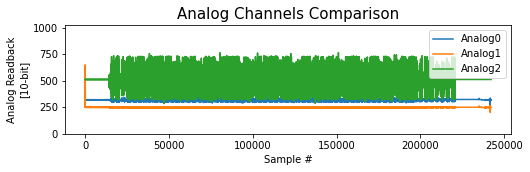

In [7]:
START_NDX = 100 # why skip initial samples?

# Make a figure to plot all analog data
plt.figure(figsize=(8,2))

for col in data.keys():
    if 'Analog' in col:
        print(f"{col} Min: {data[col][START_NDX:].min()}")
        print(f"{col} Max: {data[col][START_NDX:].max()}")
        
        # add a plot for this channel
        plt.plot(data[col][START_NDX:], label=col)


plt.title("Analog Channels Comparison", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel('Sample #')
plt.ylabel('Analog Readback\n[10-bit]')
plt.ylim([0, 1023])
plt.show()

# Read Audio Stim Files
Note that stim files were generated at 44.1 kHz, but the EEG data (alongwith aux) is sampled at 250 Hz.

Here we use ```librosa``` to downsample the audio stimuli to 250 Hz:
https://stackoverflow.com/questions/30619740/downsampling-wav-audio-file

In [8]:
# ../stim/audio/mp1_mp2.wav

import librosa
fs_eeg = 250

# read audio samples
stim_path = r'../stim/audio/' + exp
wave_files = glob(stim_path + '**/*.wav', recursive = True)

# Container for audio files
audio = {}

# Now read in all the waves
for wave_file in wave_files:
    print(f'Reading {wave_file}')
    filename = wave_file.split('/')[-1].strip('.wav')
    audio_data, audio_fs = librosa.load(wave_file, sr=fs_eeg)
    
    audio[filename] = {}
    # audio[filename]['fs'] = audio_fs # should be the same across audio files
    audio[filename] = np.array(audio_data, dtype=float) # two channels for stereo
    
audio

ModuleNotFoundError: No module named 'librosa'

# Sanity check the downsampling of audio to 250 Hz

In [ ]:
# Read one wavefile in at 44.1 kHz
fs_stim, y = read('../stim/audio/exp0/metronome.wav')
y = np.array(y[:, 0], dtype='float') # set dtype for division below
y /= np.max(np.abs(y)) # normalize
# print(y)

# Compare with librosa's downsampling
y_rs = audio['metronome']
y_rs /= np.max(np.abs(y_rs)) # normalize, as these look really small 
# also, output looks comparable to scipy.signal.resample

t = np.arange(start=0, stop=len(y)/fs_stim, step=1/fs_stim)
t_rs = np.arange(start=0, stop=len(y_rs)/fs_eeg, step=1/fs_eeg)

plt.plot(t, y, '.-', label=f'fs={fs_stim} Hz')
plt.plot(t_rs, y_rs, '*', label=f'fs={fs_eeg} Hz')
plt.legend()
plt.show()

# Compare peak times between sampling rates

In [ ]:
# Find onsets (peaks)
from scipy.signal import find_peaks
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

peaks, _ = find_peaks(
    np.abs(y), # only use one of the two channels
    height=0.5, # the smaller metronome blips also exceed 0.5
    distance=fs_stim*0.1, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
)
print(len(peaks))

peaks_rs, _ = find_peaks(
    np.abs(y_rs), # only use one of the two channels
    height=0.25, # the smaller metronome blips also exceed 0.5
    distance=fs_eeg*0.1, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
)
print(len(peaks_rs))

plt.figure()
plt.plot(t[peaks], y[peaks], '*')
plt.plot(t_rs[peaks_rs], y_rs[peaks_rs], '*')

plt.figure()
t_error = t[peaks]-t_rs[peaks_rs]
plt.plot(t_error, '*')
plt.xlabel('Peak #')
plt.ylabel('Timing Error [s]')